<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/4_4_stats_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nolds
!pip install hurst

In [2]:
# !pip install nolds
import numpy as np
import nolds

time_series = [0.29875031, 0.25506379, 0.75053665, 0.99802279, 0.53397792,
       0.94420272, 0.39661011, 0.10668245, 0.40877383, 0.29612777,
       0.49340696, 0.65704368, 0.46105022, 0.93516051, 0.88476482,
       0.7019776 , 0.48968491, 0.13168728, 0.39701367, 0.70440154,
       0.28488552, 0.10398808, 0.90789846, 0.70905081, 0.61527643,
       0.79249891, 0.83564604, 0.483459  , 0.88118825, 0.91641901,
       0.2715511 , 0.60754536, 0.52658403, 0.53794578, 0.93766309,
       0.3051887 , 0.98343398, 0.90213121, 0.45872289, 0.81745326,
       0.76904699, 0.67789497, 0.31983389, 0.19645099, 0.6715277 ,
       0.8429733 , 0.01625279, 0.64280338, 0.44287302, 0.89808776,
       0.32147293, 0.47418481, 0.5147671 , 0.14043952, 0.7128923 ,
       0.83047635, 0.05790928, 0.29138882, 0.03804468, 0.9565441 ,
       0.66716882, 0.96420042, 0.53149428, 0.80206852, 0.37441398,
       0.35381903, 0.37826782, 0.65786213, 0.35945315, 0.90036745,
       0.98327487, 0.03042652, 0.19362329, 0.11224999, 0.04236405,
       0.22774099, 0.44679332, 0.83699037, 0.22182403, 0.49394526,
       0.92961874, 0.66721471, 0.79807902, 0.55099397, 0.98046646,
       0.58866215, 0.04551071, 0.1979828 , 0.40477363, 0.60127717,
       0.77193087, 0.41308613, 0.71005831, 0.7898695 , 0.3172602 ,
       0.97927024, 0.6496565 , 0.88099806, 0.55593769, 0.74160311]

# Вычисление коэффициента Херста
H = nolds.hurst_rs(time_series)

print(f"Hurst exponent: {H}")

Hurst exponent: 0.631156209157011


coef_hurst

Коэффициент Херста показывает, насколько "предсказуемым" или "непредсказуемым" является временной ряд на долгом временном промежутке. Если коэффициент близок к 0.5, это означает, что временной ряд ведет себя как случайное блуждание без долгосрочных закономерностей. Если коэффициент больше 0.5, это указывает на то, что в ряде есть долгосрочные тенденции или циклы.

H < 0.5: временной ряд имеет антипериодическую (антикоррелированную) структуру, т.е. вероятность того, что последующее значение будет меньше предыдущего, выше, чем 0.5.
H = 0.5: временной ряд является случайным блужданием (белым шумом) без долгосрочной зависимости.
0.5 < H < 1: временной ряд обладает долгосрочной положительной зависимостью, т.е. вероятность того, что следующее значение будет больше предыдущего, выше, чем 0.5.



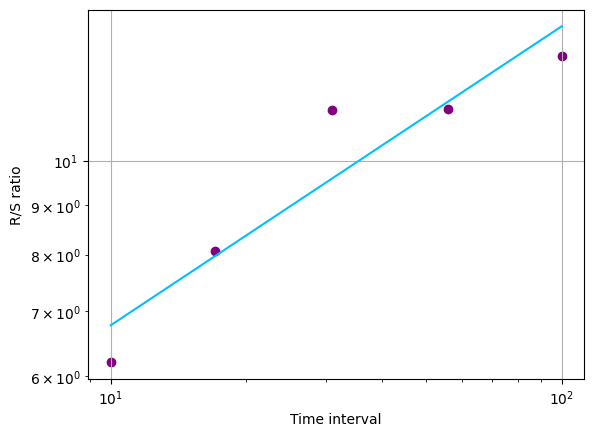

H=0.3079, c=3.3333


In [4]:
# !pip install hurst
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
# np.random.seed(42)
# random_changes = 1. + np.random.randn(99999) / 1000.
# series = np.cumprod(random_changes)  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(time_series, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))